In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [49]:
# Read in the gdp dataset
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [50]:
gdp_df = gdp_df[:-2]

In [51]:
# Look at first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [52]:
# Look at last 5 rows
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [42]:
gdp_df.describe()

,Value,Value Footnotes
count,6729.000000,1.0
mean,15468.017091,2.0
std,17995.866104,NaN
min,438.643111,2.0
25%,3170.407545,2.0
50%,8959.240204,2.0
75%,20940.081023,2.0
max,134959.989044,2.0


In [53]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [54]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [55]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
5,Afghanistan,2013,1807.762344
6,Afghanistan,2012,1772.764974
7,Afghanistan,2011,1626.764793
8,Afghanistan,2010,1671.581238
9,Afghanistan,2009,1502.354073


In [56]:
gdp_df.head(-5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6719,Zimbabwe,1999,3054.064189
6720,Zimbabwe,1998,3099.076182
6721,Zimbabwe,1997,3036.422224
6722,Zimbabwe,1996,2985.856605


In [59]:
gdp_df.shape

(6729, 3)

In [62]:
print(gdp_df.dtypes)


Country            object
Year               object
GDP_Per_Capita    float64
dtype: object


In [65]:
gdp_df.Year = pd.to_numeric(gdp_df.Year)

In [66]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [68]:
# 8.  Notice that the count increases until 2011, then declines. Sharp decline from 2017 - 2018  
gdp_df.Year.value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

In [69]:
#9
gdp_df.Country.value_counts()

Sub-Saharan Africa (IDA & IBRD)    29
Poland                             29
Rwanda                             29
Pre-demographic dividend           29
Ecuador                            29
                                   ..
Nauru                              12
Sint Maarten (Dutch part)           9
Turks and Caicos Islands            8
South Sudan                         8
Djibouti                            1
Name: Country, Length: 243, dtype: int64

In [71]:
gdp_df.Country.describe()

count                                6729
unique                                243
top       Sub-Saharan Africa (IDA & IBRD)
freq                                   29
Name: Country, dtype: object

In [74]:
gdp_df.Country.index

RangeIndex(start=0, stop=6729, step=1)

In [77]:
#10.  Create dataset for 2014 only called gdp_2014
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [78]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [79]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


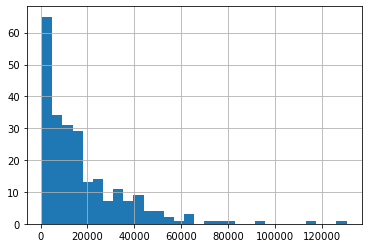

In [88]:
gdp_2014['GDP_Per_Capita'].hist(bins=30)

In [ ]:
# Observations = right skewed, uni-modal.  In most cases, mean would be higher than the median

In [91]:
#13 Top 5 and bottom 5 countries by 2014 GDP
gdp_2014.

NameError: name 'GDP_Per_Capita' is not defined

In [92]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [133]:
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]
print(gdp_1990_2017.head())

        Country  Year  GDP_Per_Capita
1   Afghanistan  2017     1758.465636
18      Albania  2017    11796.719185
45      Albania  1990     4458.247115
47      Algeria  2017    13822.389087
74      Algeria  1990    10300.015042


In [134]:
# 14 pivot to 1990 and 2017
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')

In [135]:
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [136]:
gdp_pivoted = gdp_pivoted.dropna()

In [137]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [145]:
gdp_pivoted['Percent_Change'] 

Country
Albania                164.604426
Algeria                 34.197756
Angola                  26.962413
Antigua and Barbuda     28.335476
Arab World              48.145972
                          ...    
Vietnam                327.655604
World                   73.179298
Yemen                  -29.812379
Zambia                  58.933215
Zimbabwe                -8.907075
Name: Percent_Change, Length: 209, dtype: float64

In [146]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


In [147]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

<ipython-input-147-59379f0cdf4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [143]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


In [148]:
gdp_pivoted.sort_values("Percent_Change")

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
...,...,...,...
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629


In [151]:
gdp_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]

In [152]:
gdp_negative

Year,1990,2017,Percent_Change
Country,,,
Aruba,37140.024657,35861.828118,-3.441561
Brunei,84693.336970,72523.729446,-14.369026
Burundi,1027.396660,670.777072,-34.710993
Central African Republic,982.659793,746.434942,-24.039332
Comoros,2580.500555,2555.966364,-0.950753
Congo,5323.022707,5103.142821,-4.130734
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
Gabon,19556.665840,16144.935297,-17.445359
Guinea-Bissau,1633.612989,1576.748994,-3.480873


In [155]:
gdp_negative_sorted = gdp_negative.sort_values(by=['Percent_Change'])

In [156]:
gdp_negative_sorted.count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

In [157]:
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]

In [158]:
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted

Year,1990,2017,Percent_Change
Country,,,
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629
China,1521.963868,15253.993071,902.257241
Equatorial Guinea,1017.764136,22298.942144,2090.973464


In [159]:
# 17  Equatorial Guinea experienced the highest increase.  Drop a line plot showing the Y-by-Y GDP_per_capita
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']

In [160]:
gdp_df_eq_guin

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748
1696,Equatorial Guinea,2013,32959.108100
1697,Equatorial Guinea,2012,35887.816302
1698,Equatorial Guinea,2011,34622.116266
1699,Equatorial Guinea,2010,33990.146771
1700,Equatorial Guinea,2009,39060.913034


TypeError: unhashable type: 'numpy.ndarray'

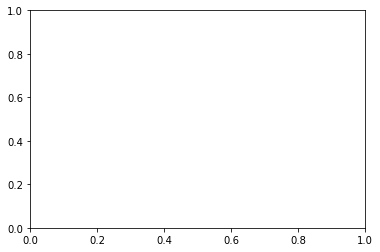

In [161]:
plt.plot(gdp_df_eq_guin)